In [0]:
import os
path = "(...)/ps1/src"
os.chdir(path)

%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

import util
from linear_model import LinearModel

In [0]:
class LogisticRegression(LinearModel):
    """Logistic regression with Newton's Method as the solver."""

    def fit(self, X, y):
        #function g
        g = lambda X: 1 / (1 + np.exp(-X))
        m, n = X.shape
        
        # starting theta = 0
        if self.theta is None:
            self.theta = np.zeros(n)
        
        # update theta
        while True:
            theta = self.theta
            
            # J 
            X_theta = X.dot(theta)
            J = -(1/m)*(y-g(X_theta)).dot(X)
            
            # H 
            H = (1/m)*g(X_theta).dot(g(1-X_theta))*(X.T).dot(X)
            H_inv = np.linalg.inv(H)
            
            # theta update using Newton's Method
            self.theta = theta - H_inv.dot(J)

            # Plot decision boundary on top of validation set 
            plt.plot(self.theta*X)

            
            # if norm is small, then break
            if np.linalg.norm(self.theta-theta, ord=1)<self.eps:
                break

    def predict(self, X):
        g = lambda X: 1 / (1 + np.exp(-X))
        preds = g(X.dot(self.theta))
        return preds

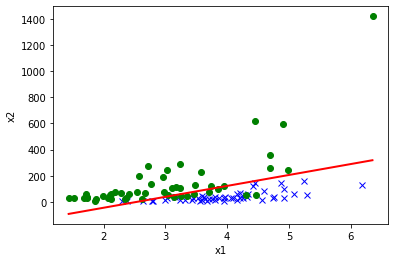

In [12]:
train_path = "(...)/ps1/data/ds1_train.csv"
eval_path = "(...)/ps1/data/ds1_valid.csv"

#train a logistic regression classifier
X_train, y_train = util.load_dataset(train_path, add_intercept=True)
model = LogisticRegression(eps=1e-5, verbose=True)
model.fit(X_train, y_train)

# Plot decision boundary on top of validation set 
X_val, y_val = util.load_dataset(eval_path, add_intercept=True)
y_pred = model.predict(X_val)
util.plot(X_val, y_val, model.theta)

In [8]:
y_val

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [11]:
np.round(y_pred,0)

array([0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])